<a href="https://colab.research.google.com/github/ruthishkumar18/Steel_Surface_Defect_Detection_Using_YOLO11/blob/main/1_NEU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 01 # Install the Ultralytics Package**

In [ ]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 949.8/949.8 kB 40.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 42.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

**Step 02 # Import All the Requried Libraries**

In [ ]:
import ultralytics
ultralytics.checks()

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 41.1/112.6 GB disk)


In [ ]:
from ultralytics import YOLO
from IPython.display import Image

**Step # 03 Download Dataset from Roboflow**

In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="38qC8n7h0Zy1KvGZh2eh")
project = rf.workspace("kunal-gaikwad").project("augmented-neu-dataset")
version = project.version(3)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Augmented-Neu-Dataset--3 in yolov11:: 100%|██████████| 22252/22252 [00:03<00:00, 6773.16it/s]


In [ ]:
dataset.location

'/content/Augmented-Neu-Dataset--3'

**Step # 04 Train YOLO11 Model on a Custom Dataset**

In [ ]:
!yolo task=detect mode=train data={dataset.location}/data.yaml model="/content/yolo11m.pt" epochs=1 imgsz=200

100% 38.8M/38.8M [00:00<00:00, 322MB/s]
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=/content/yolo11m.pt, data=/content/Augmented-Neu-Dataset--3/data.yaml, epochs=1, time=None, patience=100, batch=16, imgsz=200, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=Fal

**Step # 05 Examine Training Results**

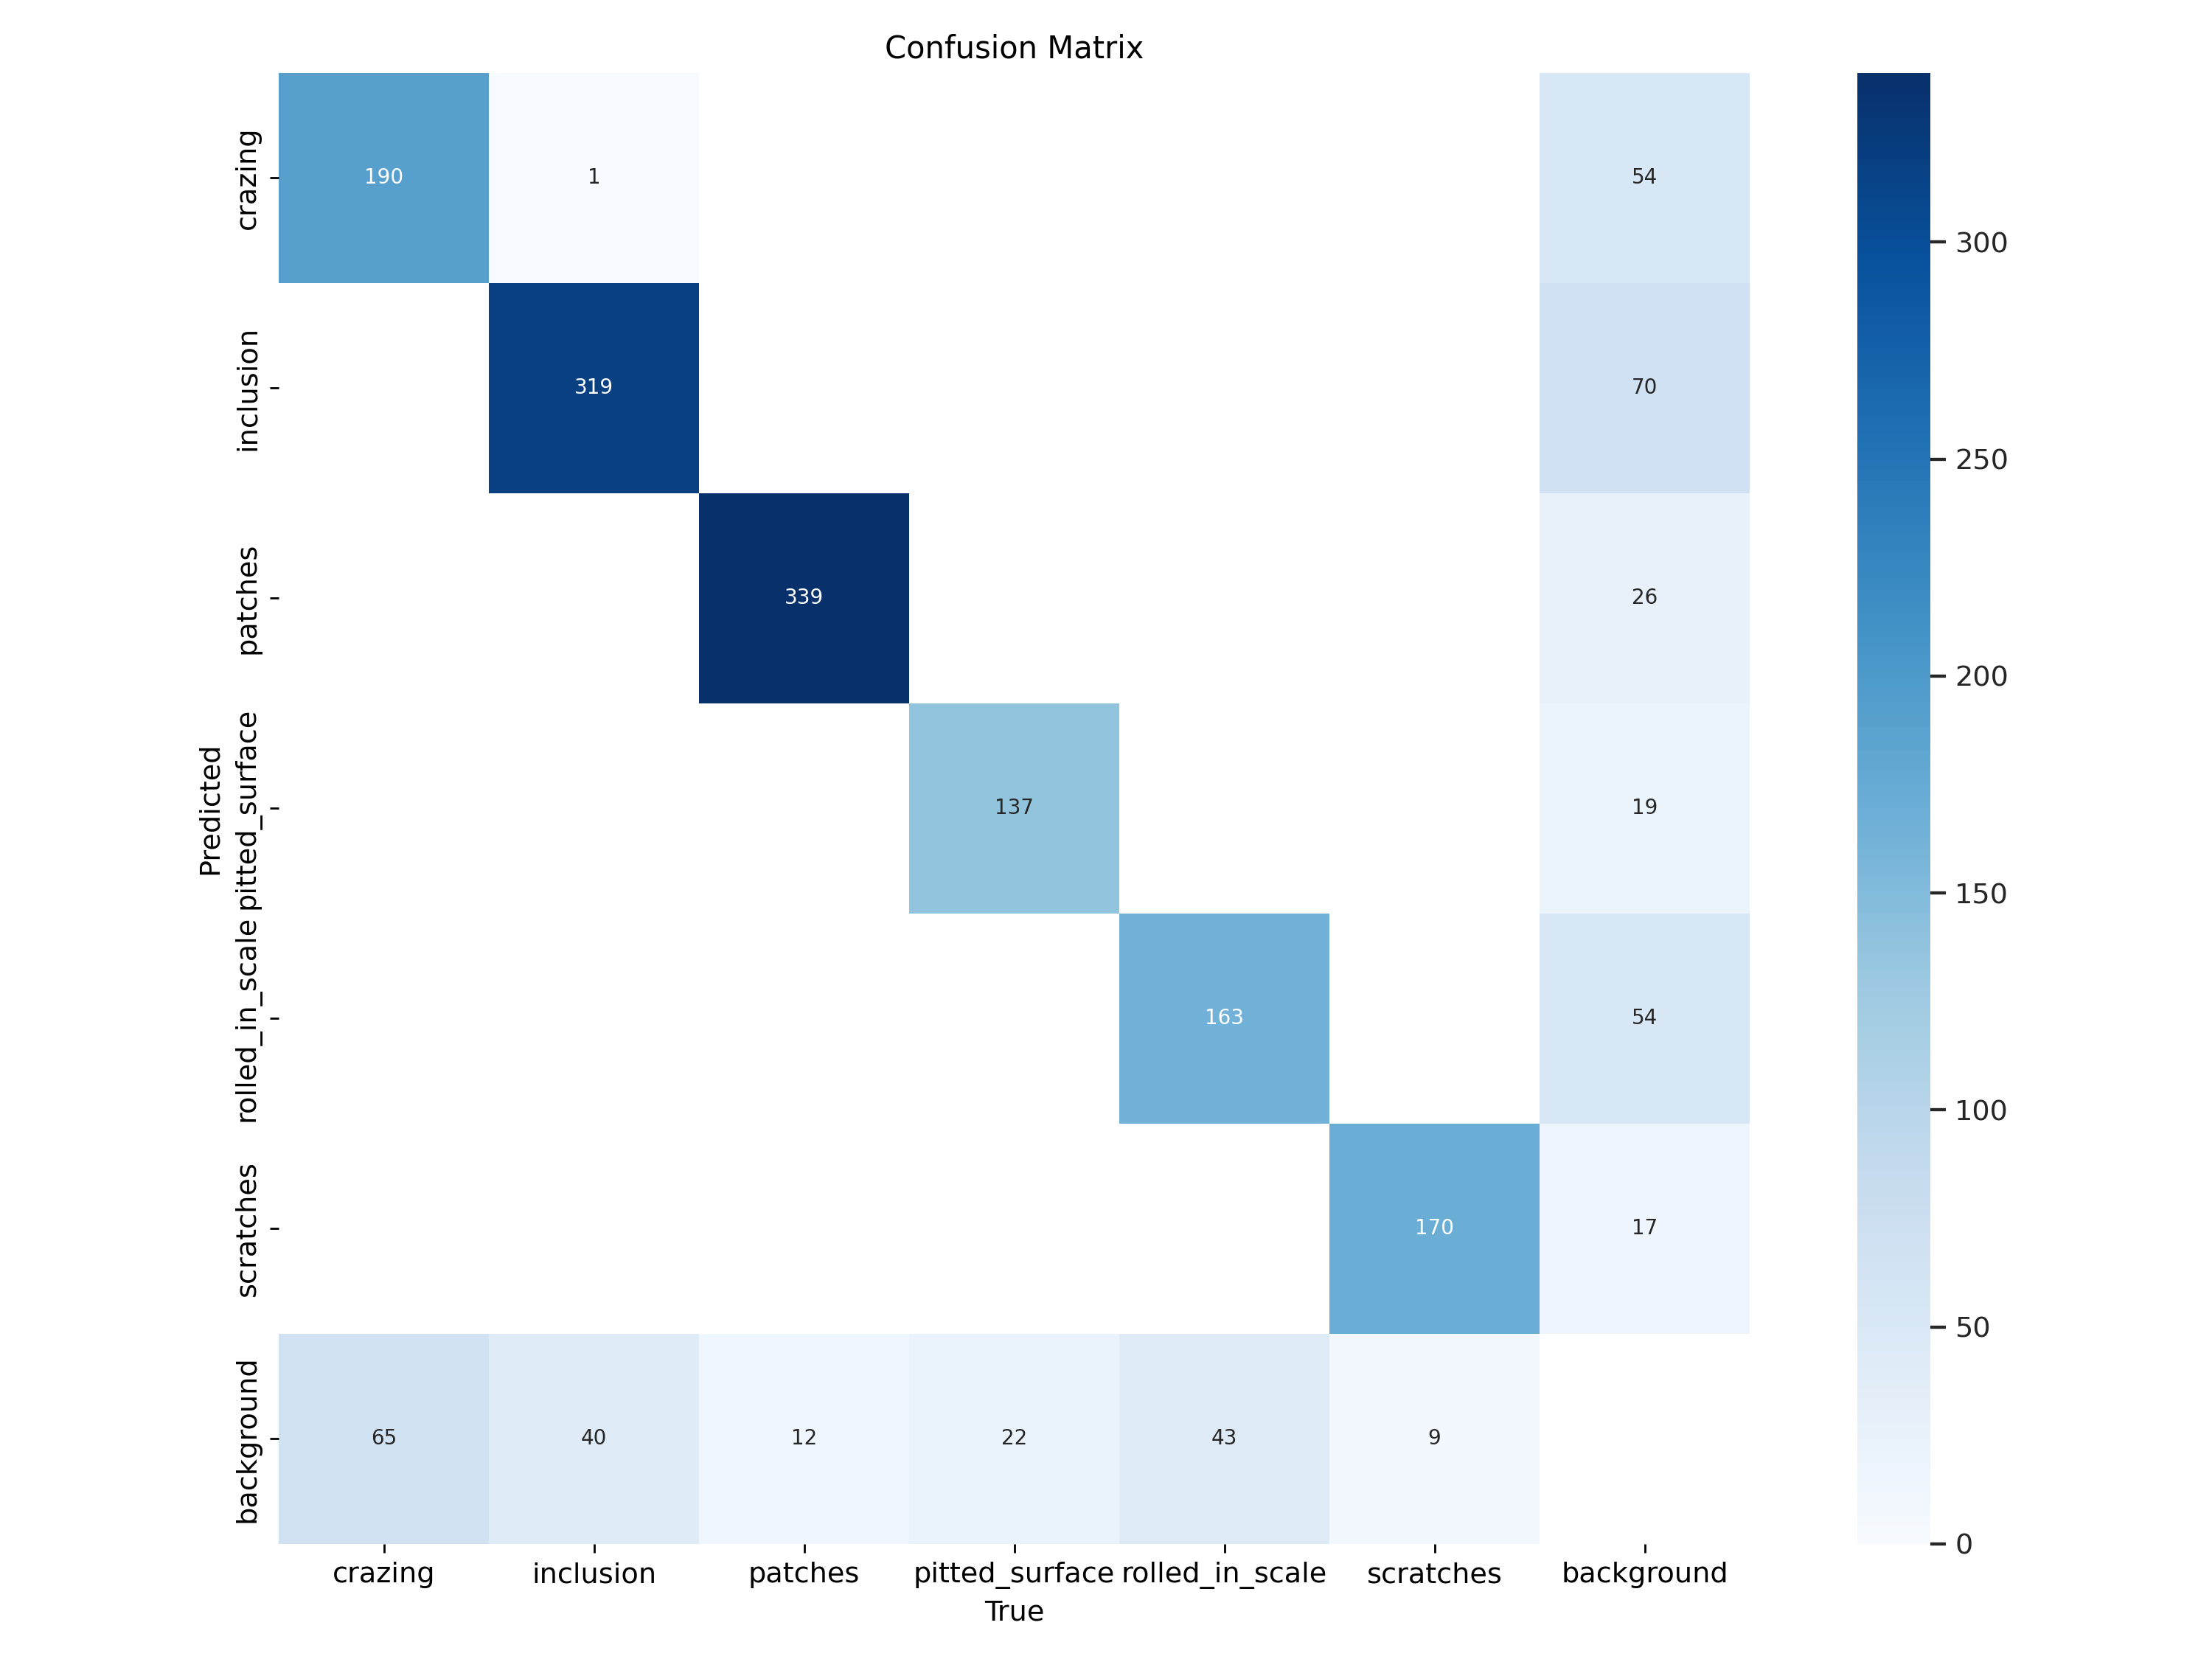

In [ ]:
Image("/content/confusion_matrix.png", width=600)

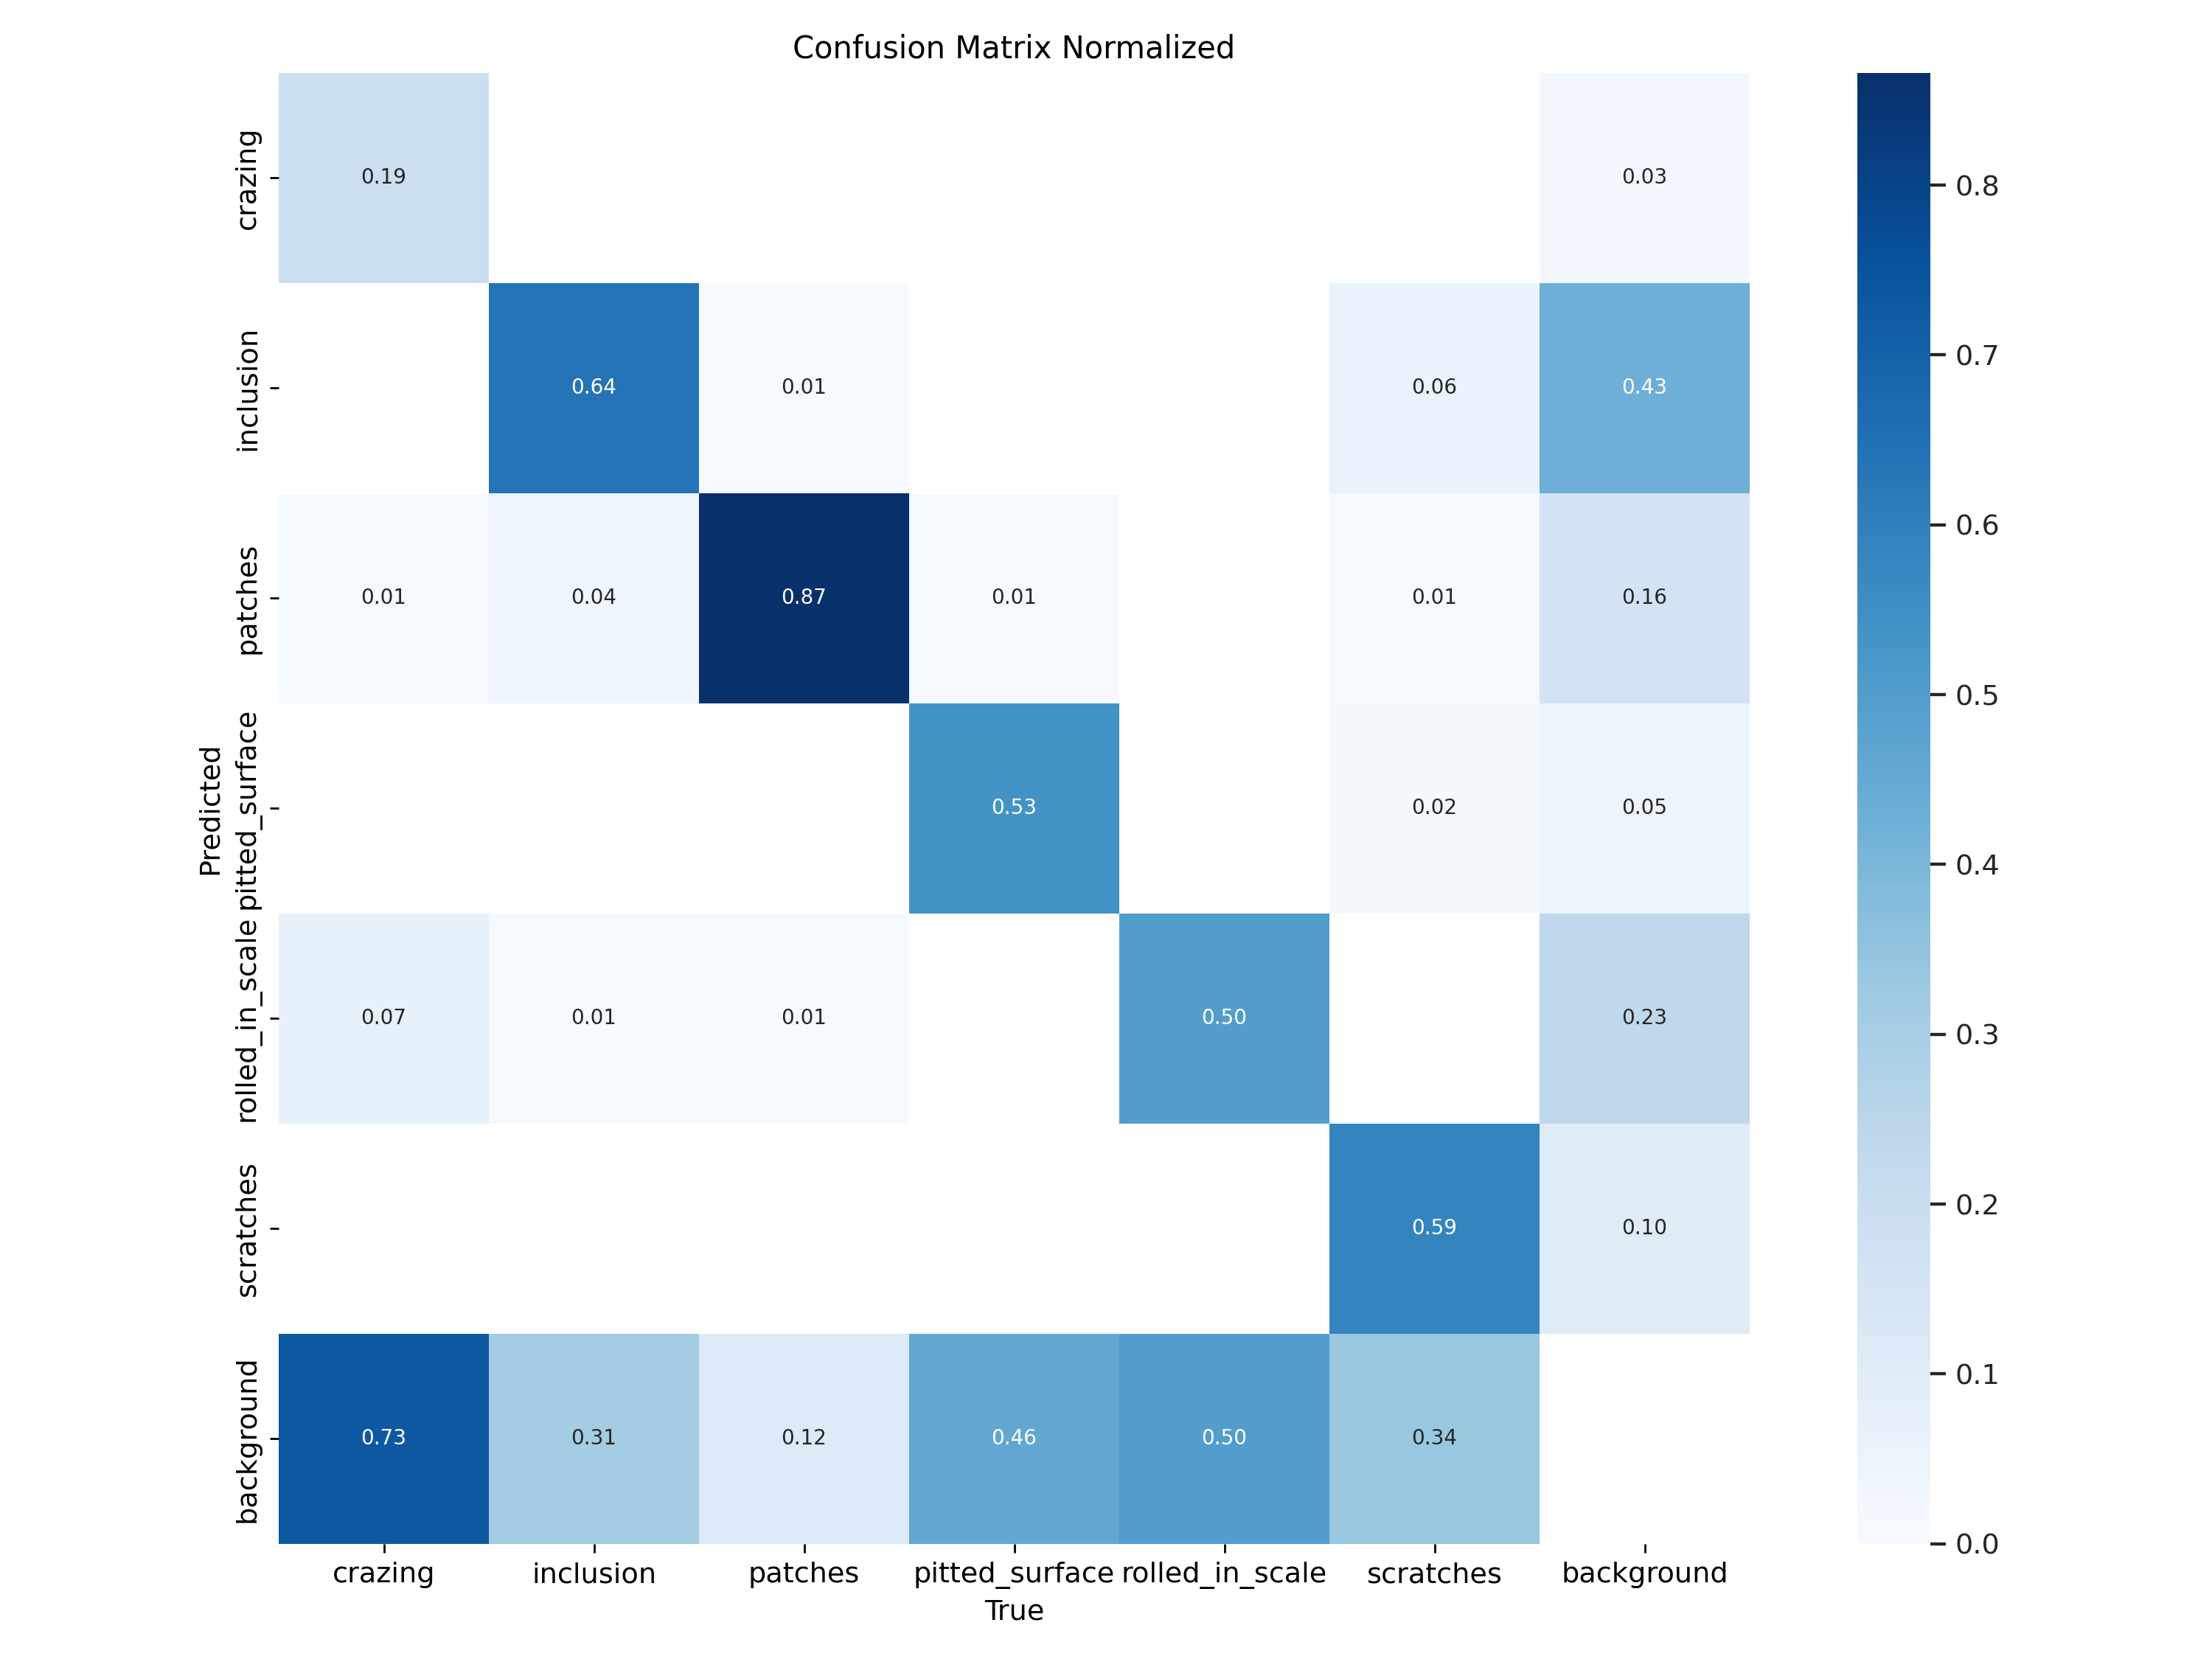

In [ ]:
Image("/content/runs/detect/train/confusion_matrix_normalized.png", width=600)

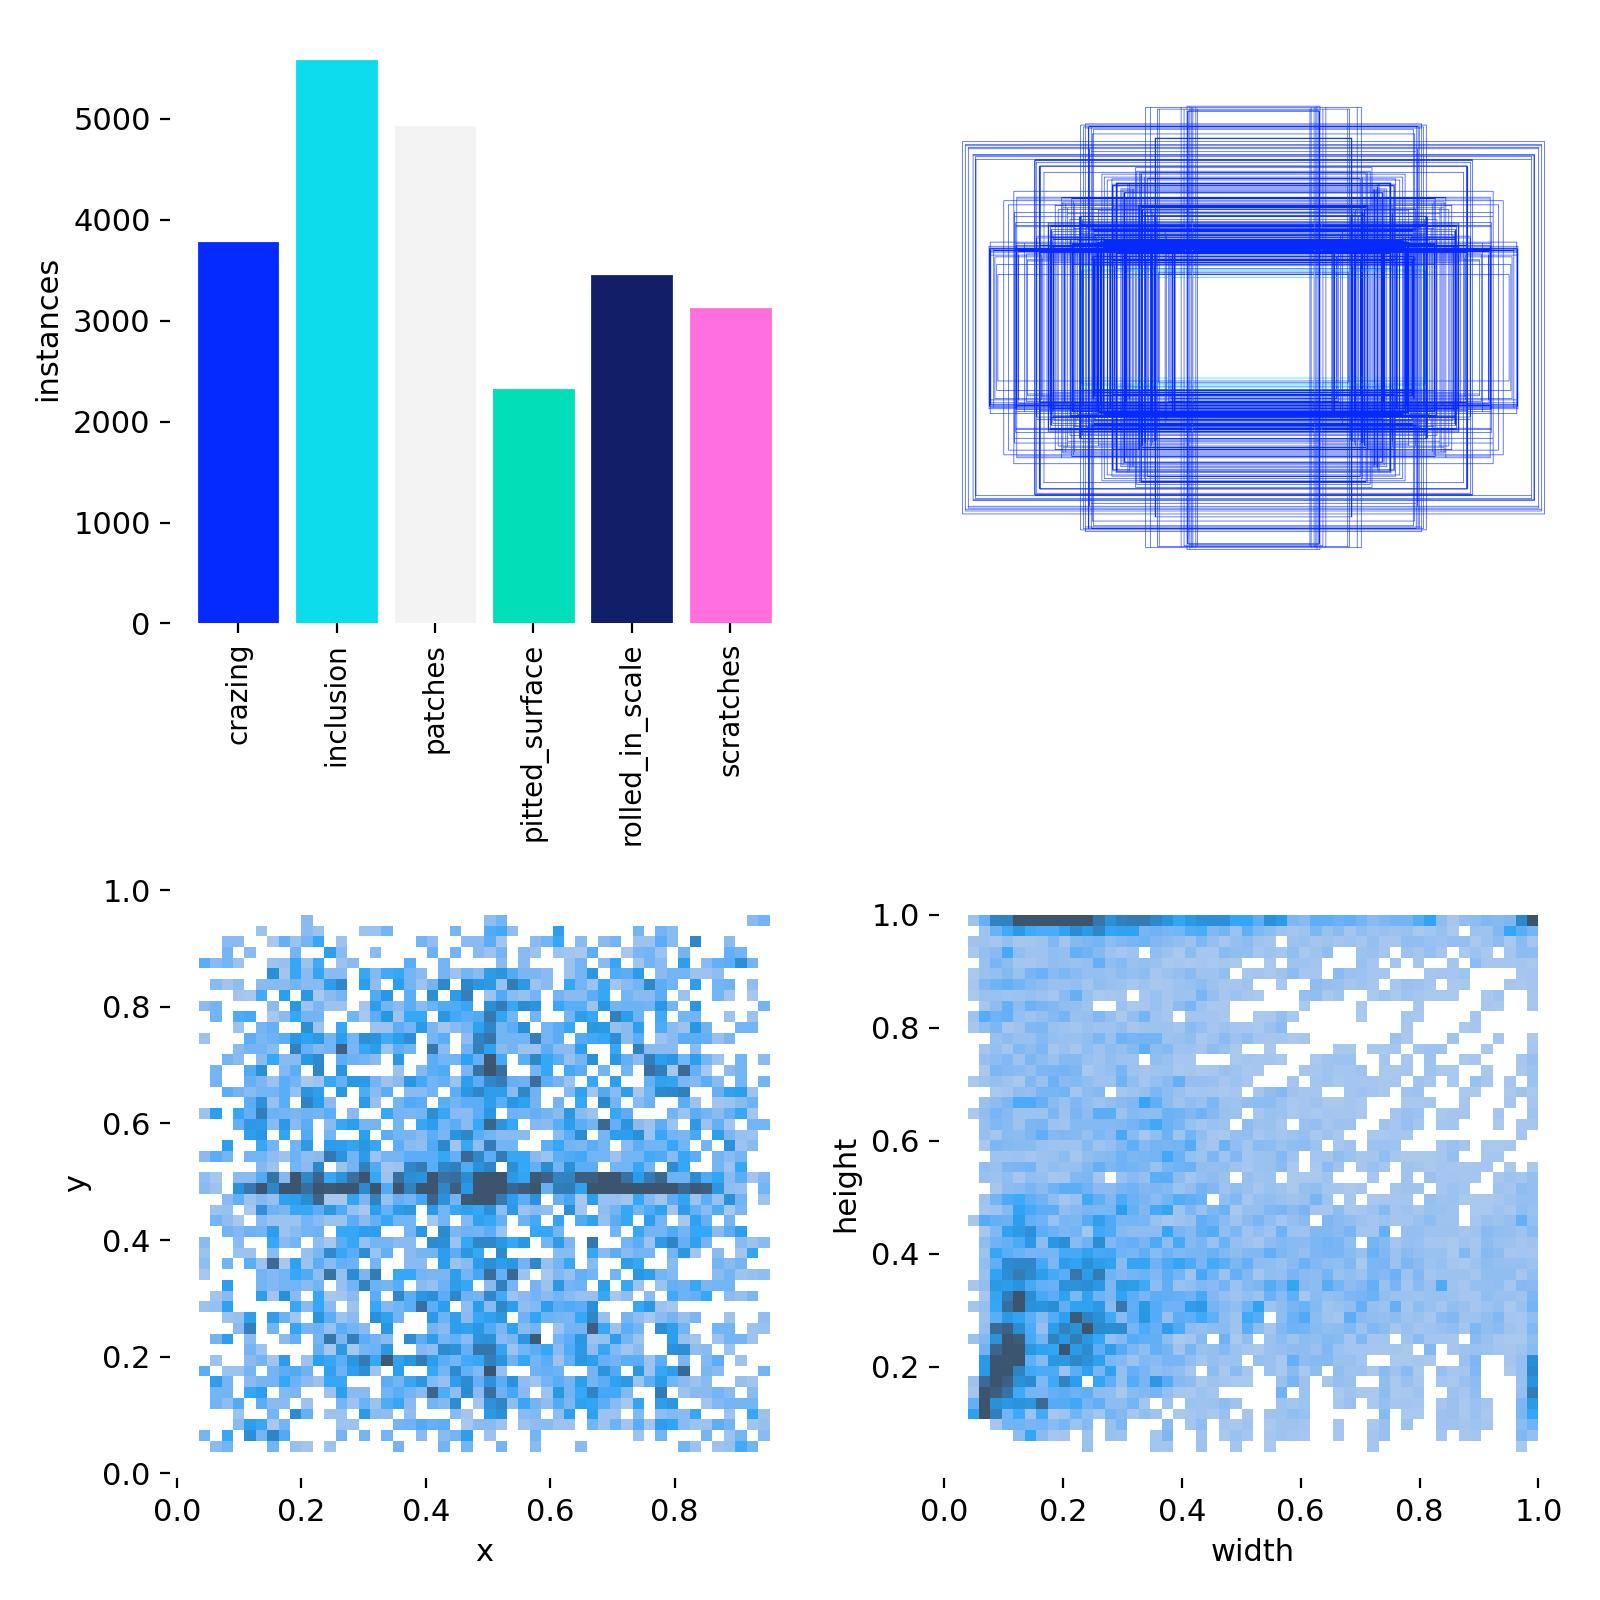

In [ ]:
Image("/content/runs/detect/train/labels.jpg", width=600)

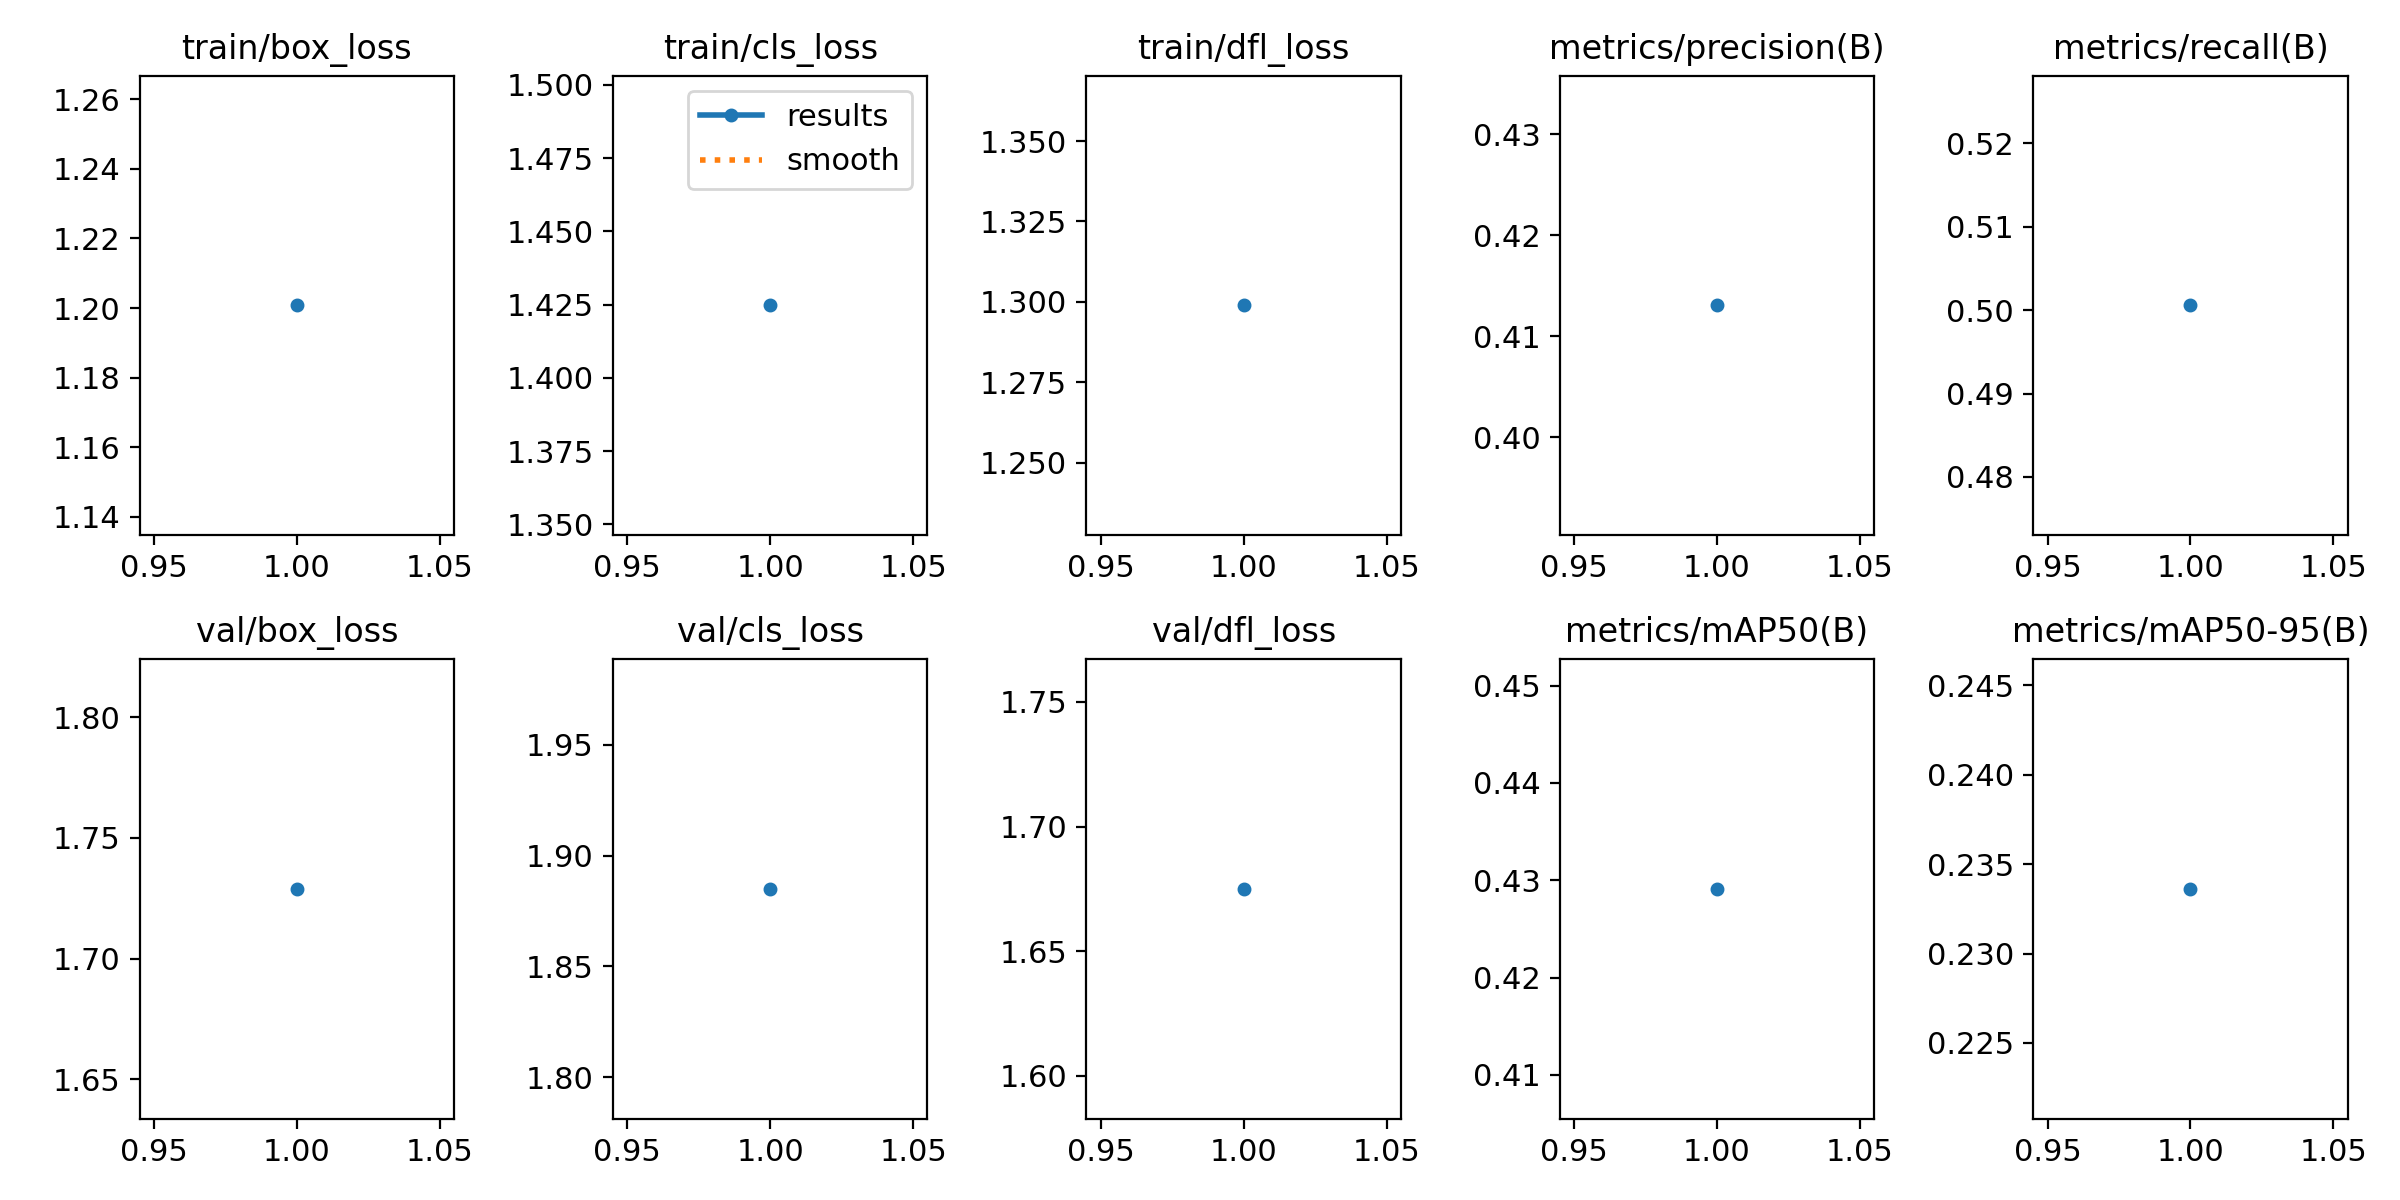

In [ ]:
Image("/content/runs/detect/train/results.png", width=600)

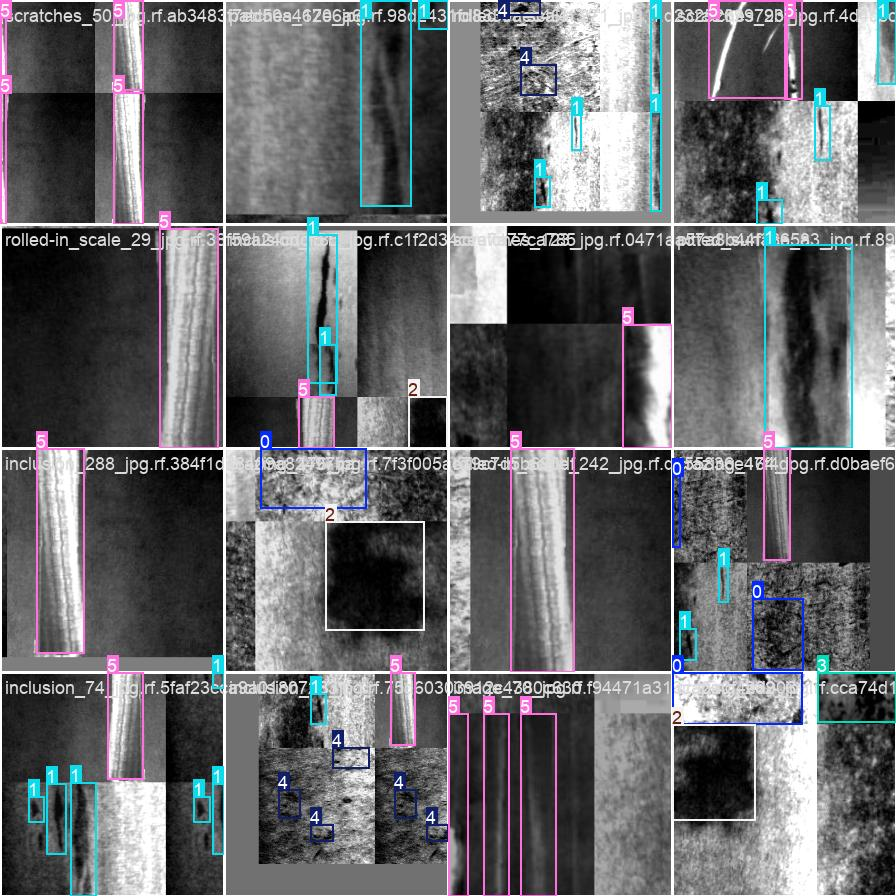

In [ ]:
Image("/content/runs/detect/train/train_batch0.jpg", width=600)

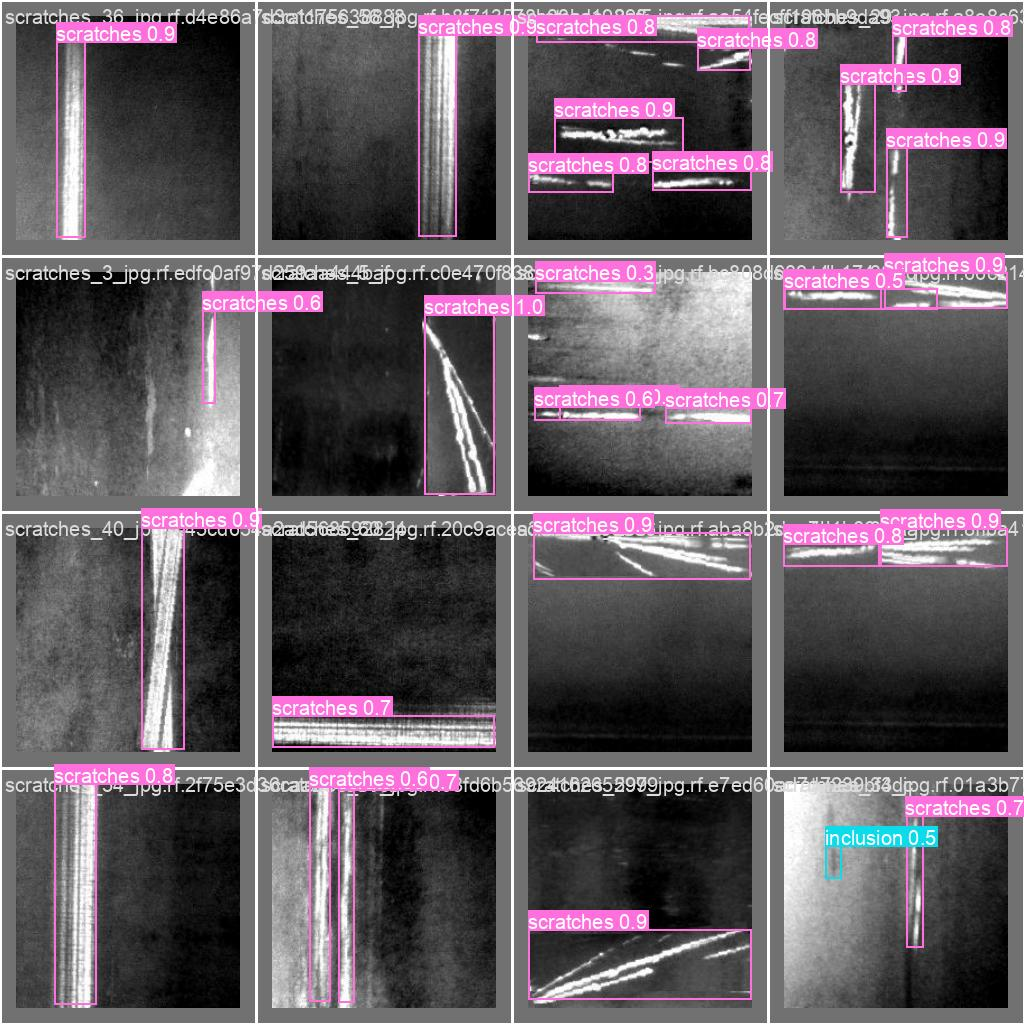

In [ ]:
Image("/content/runs/detect/train/val_batch0_pred.jpg", width=600)

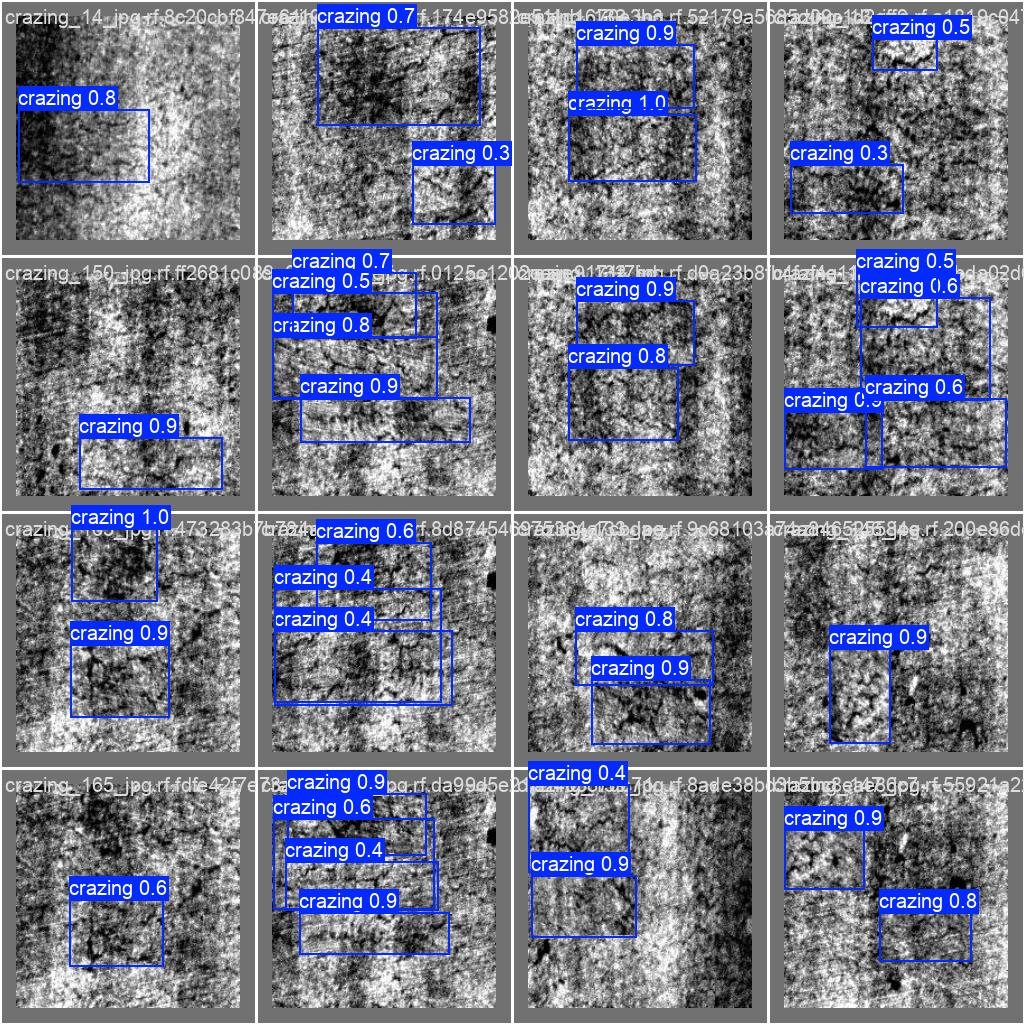

In [ ]:
Image("/content/runs/detect/train/val_batch1_pred.jpg", width=600)

**Step # 07  Validate Fine-Tuned Model**

In [ ]:
!yolo task=detect mode=val model="/content/runs/detect/train/weights/best.pt" data={dataset.location}/data.yaml

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs
val: Scanning /content/Augmented-Neu-Dataset--3/valid/labels.cache... 684 images, 33 backgrounds, 0 corrupt: 100% 684/684 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 43/43 [00:05<00:00,  7.89it/s]
                   all        684       1510      0.414      0.501       0.43      0.234
               crazing        107        255       0.57      0.165      0.324       0.17
             inclusion        142        360       0.26      0.631      0.443      0.184
               patches        135        351      0.557      0.872      0.828      0.531
        pitted_surface        112        159      0.536      0.503      0.503      0.309
       rolled_in_scale         97        206      0.191      0.408      0.209     0.0944
             scratches        105 

**Step # 08 Inference with Custom Model on Images**

In [ ]:
!yolo task=detect mode=predict model="/content/runs/detect/train/weights/best.pt" conf=0.25 source={dataset.location}/test/images save=True

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11m summary (fused): 125 layers, 20,034,658 parameters, 0 gradients, 67.7 GFLOPs

image 1/349 /content/Augmented-Neu-Dataset--3/test/images/adjusted_image_4_jpg.rf.88869dab5a8d0120968b3ce9a1df3466.jpg: 224x224 1 inclusion, 1 patches, 15.0ms
image 2/349 /content/Augmented-Neu-Dataset--3/test/images/bg-89-_jpg.rf.e7f2bbcc74135a62a438762d6a71c191.jpg: 224x224 (no detections), 12.1ms
image 3/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_109_jpg.rf.04f08bbb72a0dc4d397aba9f00ebc94e.jpg: 224x224 1 crazing, 11.6ms
image 4/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_110_jpg.rf.deffe48701d6bd1881aedf4b27d0167e.jpg: 224x224 2 crazings, 1 patches, 11.6ms
image 5/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_113_jpg.rf.90f5afcd3320ab26af35133424f9443a.jpg: 224x224 2 rolled_in_scales, 11.6ms
image 6/349 /content/Augmented-Neu-Dataset--3/test/images/crazing_125_jpg.rf.2c005090fe

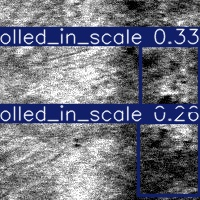

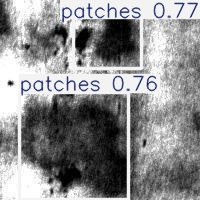

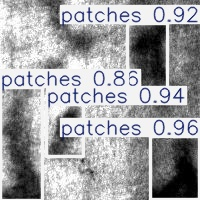

In [ ]:
import glob
import os
from IPython.display import Image as IPyImage, display

latest_folder = max(glob.glob('/content/runs/detect/predict'), key=os.path.getmtime)
for img in glob.glob(f'{latest_folder}/*.jpg')[1:4]:
    display(IPyImage(filename=img, width=600))
    print("\n")